# Ambilabs 2 Wavelength Nephelometer

### Nephelometer that is configured to calculate scattering coefficient of light due to particulate matter at two selectible wavelenghts. 
### Users have a choice between 450nm, 525nm, 635nm 

In [1]:
import act
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

### Processing Options

In [2]:
## Define the data directory
DATA_DIR = '/Users/jrobrien/ANL/Projects/USAF_FireWx/Nov2022/2Win_Neph/'

### Meta Data Descriptions

In [3]:
major_status = { 0 : 'Normal', 1 : "Span Calibration", 2 : "Zero Calibration", 3 : "Span Check", 4 : "Zero Check",
                 5 : 'Zero Offset Adjust', 6 : "System Calibration / Setup", 7 : "Environmental Cal"}

In [4]:
major_status[1]

'Span Calibration'

### Read in the Data

In [5]:
# Define column names
columns = ["Date_Time","Major_State","Major_State_Status","Scattering_Coefficient_635nm",
           "Scattering_Coefficient_635nm_Status","Scattering_Coefficient_450nm",
           "Scattering_Coefficient_450nm_Status","Sample_temperature","Sample_temperature_Status",
           "Enclosure_temperature","Enclosure_temperature_Status","Relative_humidity",
           "Relative_humidity_Status","Atmospheric_pressure","Atmospheric_pressure_Status",
           "Angstrom_Exponent","Angstrom_Exponent_Status","PM_Estimate","PM_Estimate_Status",
           "DIO_State","DIO_State_Status"]

In [6]:
units = ["CST", "#", "#", "Mm-1", "#", "Mm-1", "#", "C", "#", "C", "#", "kg/kg", "#", "mb", "#",
         "Unitless", "#", "NotSure", "#", '#']

In [7]:
# Note: parse_dates option will 'magically' parse the Date_Time column format YYYY/MM/DD HH:MM:SS 
#       into numpy datetime object
ds = act.io.read_csv(DATA_DIR + 'Argonne_2Win_Nephelometer_1minute_20221101_0000.csv', 
                     column_names=columns, 
                     skiprows=1,
                     parse_dates=['Date_Time'])

In [8]:
ds

<xarray.Dataset>
Dimensions:                              (index: 2929)
Coordinates:
  * index                                (index) int64 0 1 2 ... 2926 2927 2928
Data variables: (12/21)
    Date_Time                            (index) datetime64[ns] 2022-11-01T18...
    Major_State                          (index) int64 0 0 0 0 0 0 ... 0 0 0 0 0
    Major_State_Status                   (index) int64 144 144 144 ... 144 144
    Scattering_Coefficient_635nm         (index) float64 24.97 24.85 ... 28.05
    Scattering_Coefficient_635nm_Status  (index) int64 144 144 144 ... 144 144
    Scattering_Coefficient_450nm         (index) float64 42.55 44.03 ... 33.44
    ...                                   ...
    Angstrom_Exponent                    (index) float64 -1.548 ... -0.512
    Angstrom_Exponent_Status             (index) int64 144 144 144 ... 144 144
    PM_Estimate                          (index) float64 24.97 24.81 ... 28.05
    PM_Estimate_Status                   (index) int64 144 144 144 ... 144 144
    DIO_State                            (index) int64 0 0 0 0 0 0 ... 0 0 0 0 0
    DIO_State_Status                     (index) int64 144 144 144 ... 144 144
Attributes:
    _datastream:          Argonne_2Win_Nephelometer_1minute_20221101_0000.csv
    _site:                Arg
    _arm_standards_flag:  0

In [9]:
## Assign new coordinates to the xarray dataset
ds = ds.assign_coords({'time' : ds.Date_Time})

In [10]:
ds

<xarray.Dataset>
Dimensions:                              (index: 2929)
Coordinates:
  * index                                (index) int64 0 1 2 ... 2926 2927 2928
    time                                 (index) datetime64[ns] 2022-11-01T18...
Data variables: (12/21)
    Date_Time                            (index) datetime64[ns] 2022-11-01T18...
    Major_State                          (index) int64 0 0 0 0 0 0 ... 0 0 0 0 0
    Major_State_Status                   (index) int64 144 144 144 ... 144 144
    Scattering_Coefficient_635nm         (index) float64 24.97 24.85 ... 28.05
    Scattering_Coefficient_635nm_Status  (index) int64 144 144 144 ... 144 144
    Scattering_Coefficient_450nm         (index) float64 42.55 44.03 ... 33.44
    ...                                   ...
    Angstrom_Exponent                    (index) float64 -1.548 ... -0.512
    Angstrom_Exponent_Status             (index) int64 144 144 144 ... 144 144
    PM_Estimate                          (index) float64 24.97 24.81 ... 28.05
    PM_Estimate_Status                   (index) int64 144 144 144 ... 144 144
    DIO_State                            (index) int64 0 0 0 0 0 0 ... 0 0 0 0 0
    DIO_State_Status                     (index) int64 144 144 144 ... 144 144
Attributes:
    _datastream:          Argonne_2Win_Nephelometer_1minute_20221101_0000.csv
    _site:                Arg
    _arm_standards_flag:  0

### Calculate PM Estimate for 450nm and 635nm

In [18]:
pm_450nm = ds.Scattering_Coefficient_450nm.data[:] * 0.180

In [19]:
pm_635nm = ds.Scattering_Coefficient_635nm.data[:] * 0.360

## Calculate Single Scattering Albedo

In [32]:
# Assume Absorption Coefficient is 1/wavelength (black carbon)
SSA_450nm = ds.Scattering_Coefficient_450nm.data[:] / (ds.Scattering_Coefficient_450nm.data[:] + (1 / (450*1e-6)))

In [33]:
# Assume Absorption Coefficient is 1/wavelength (black carbon)
SSA_635nm = ds.Scattering_Coefficient_635nm.data[:] / (ds.Scattering_Coefficient_635nm.data[:] + (1 / (635*1e-6)))

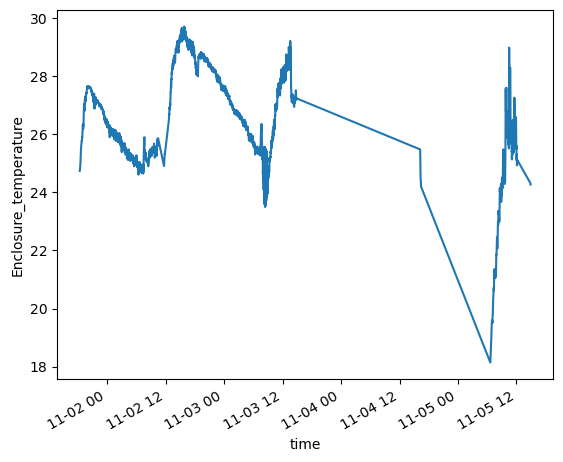

In [44]:
ds.Enclosure_temperature.plot(x='time')

In [24]:
ds.time.data

array(['2022-11-01T18:23:00.000000000', '2022-11-01T18:24:00.000000000',
       '2022-11-01T18:25:00.000000000', ...,
       '2022-11-05T12:11:00.000000000', '2022-11-05T14:53:00.000000000',
       '2022-11-05T14:54:00.000000000'], dtype='datetime64[ns]')

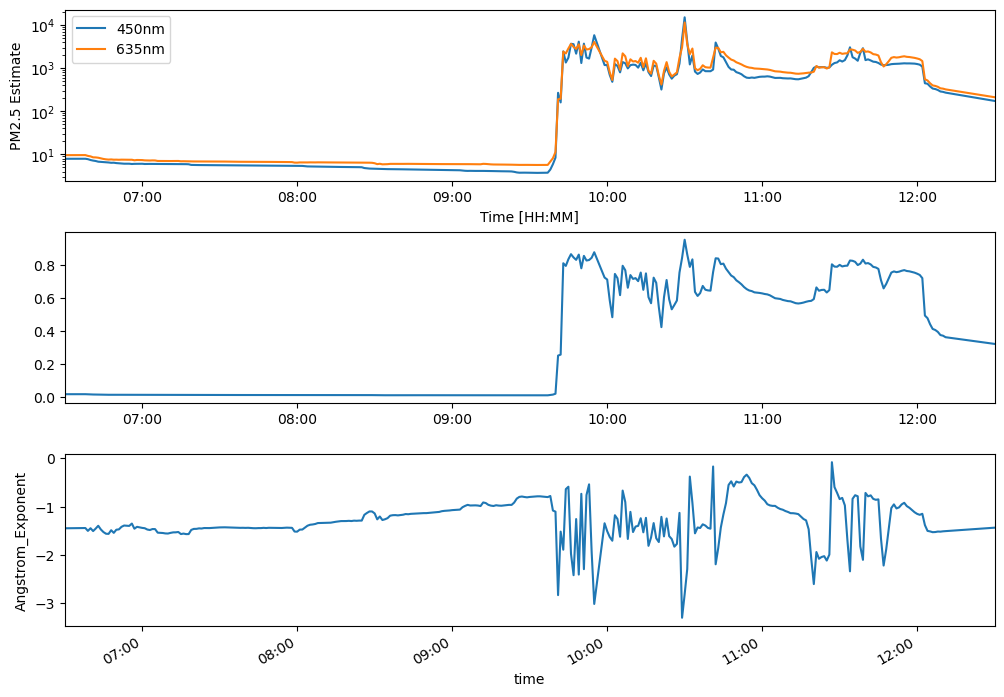

In [48]:
fig, axarr = plt.subplots(3, 1, figsize=[12, 8])
plt.subplots_adjust(hspace=0.3)

#ds.Scattering_Coefficient_635nm.plot(x='time', yscale='log', 
#                                         ax=axarr[0], label='635nm')
#ds.Scattering_Coefficient_450nm.plot(x='time', yscale='log', 
#                                     ax=axarr[0], label='450nm')

# Define the date format
date_form = DateFormatter("%H:%M")
axarr[0].xaxis.set_major_formatter(date_form)

"""
axarr[0].set_xlim(["2022-11-05T06:30:00", "2022-11-05T12:30:00"])
axarr[0].set_ylabel(r'Scattering Coefficient [Mm$^{-1}$]')
axarr[0].set_xlabel('Time [HH:MM CST]')
axarr[0].set_title("USAF Wildland Fire Ex - Burn #1 - 5 Nov 2022")
axarr[0].legend()
"""
axarr[0].semilogy(ds.time.data, pm_450nm, label='450nm')
axarr[0].plot(ds.time.data, pm_635nm, label='635nm')
axarr[0].set_ylabel('PM2.5 Estimate')
axarr[0].set_xlabel("Time [HH:MM]")
axarr[0].set_xlim(["2022-11-05T06:30:00", "2022-11-05T12:30:00"])
axarr[0].xaxis.set_major_formatter(date_form)
axarr[0].legend()

#ds.Angstrom_Exponent.plot(x='time', ax=axarr[1])
#axarr[1].set_ylabel('Scattering Angstrom Exponent \n [Unitless]')
axarr[1].xaxis.set_major_formatter(date_form)
axarr[1].plot(ds.time.data, SSA_635nm, label='SSA 635nm')
axarr[1].set_ylabel('Single Scattering Albedo')
axarr[1].set_xlim(["2022-11-05T06:30:00", "2022-11-05T12:30:00"])

ds.Angstrom_Exponent.plot(x='time', ax=axarr[2])
axarr[2].set_xlim(["2022-11-05T06:30:00", "2022-11-05T12:30:00"])
axarr[2].xaxis.set_major_formatter(date_form)


In [ ]:
fig, axarr = plt.subplots(1, 1, figsize=[12, 8])
##plt.subplots_adjust(hspace=0.3)

#ds.Scattering_Coefficient_Channel_1.plot(x='time', yscale='log', 
#                                         ax=axarr[0], label='635nm')
#ds.Backscatter_Channel_2_RED.plot(x='time', yscale='log', 
#                                  ax=axarr[0], label='450nm')



# Define the date format
date_form = DateFormatter("%H:%M")
axarr[0].xaxis.set_major_formatter(date_form)

axarr[0].set_xlim(["2022-11-05T06:30:00", "2022-11-05T12:30:00"])
axarr[0].set_ylabel(r'Scattering Coefficient [Mm$^{-1}$]')
axarr[0].set_xlabel('Time [HH:MM CST]')
axarr[0].set_title("USAF Wildland Fire Ex - Burn #1 - 5 Nov 2022")
axarr[0].legend()


In [31]:
print(1 / (635*1e-6))

1574.8031496062995
